<p style="text-align:center; font-size:32px; font-weight:bold; color:blue;">
    Binary Classification (Categorical Data): Stroke Prediction Model
</p>


## Table of Contents

- [Business Understanding](#1:-business-understanding)
- [Analytical Approach, Data Requirement/Collection/Understanding](#2:-analytical-approach-data-requirement-collection-understanding)
- [Exploratory Data Analysis (EDA)](#3:-Exploratory-Data-Analysis (EDA))
- [Data Preparation (Python or SQL)](#4:-Data-Preparation-(Python-or-SQL)
- [Dealing with Imbalanced Datasets](#5:-Dealing-With-Imbalanced-Datsets)
- [Model Development](#6:-Model-Development)
- [Model Evaluation](#6:-Model-Evaluation)
- [Model Deployment](#7:-Evaluation)



## 1: Business Understanding

The goal is to predict likelihood of stroke using various patient health signals
and subsequently identify which factors contribute to stroke so that healthcare practitioners can better understand how to control this in patients


## 2: Analytical Approach, Data Requirement/Collection/Understanding

### 2.1. Analytical Approach

Binary-Classification Modelling with XGBoost, Random forests, k-nearest neighbours and log regression

### 2.2. Data Requirements

Require labelled dataset with various patient factors and their effect on Stroke in the patient. Even split of patients diagnosed with Parkinsons and those who are not. If dataset is imbalanced, methods such as SMOTE analysis will be required to balance the dataset

### 2.3. Data Collection

Data will be extracted from a stroke prediction dataset obtained from an online medical repository

The dataset contains 5110 datapoint composed of 2995 females and 2115 females

### 2.4. Data Attributes

| **Variable**          | **Description**                                             |
|-----------------------|-------------------------------------------------------------|
| id                    | Patient ID number                                          |
| gender                | Patient sex (male or female)                              |
| age                   | Age of the patient                                        |
| hypertension          | Patient hypertension status ("0" - No, "1" - Yes)        |
| ever_married          | Marital status ("Yes" or "No")                            |
| work_type             | Patient occupation                                        |
| Residence_type        | Rural or urban living location                            |
| avg_glucose_level     | Patient's blood sugar level                               |
| bmi                   | Patient's body mass index                                |
| smoking_status        | Status of person's smoking habits                         |
| Stroke                | Previous history of stroke ("0" - no stroke, "1" - stroke)|


### 2.5. Data Understanding (Descriptive statistics/data shape etc.)

In [15]:
# Read the dataset

import pandas as pd  # import pandas module
pd.set_option('display.max_columns', None) # specify how many columns you want to show
df_stroke = pd.read_csv('Stroke.csv') # read the file into a pandas dataframe
df_stroke # view dataframe containing the data


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,Yes,No,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,No,No,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,No,No,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,No,No,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [16]:
# Check the datatype of each column to identify if columns have numerical or categorical variables which is important before cleaning the data
df_stroke.dtypes

id                     int64
gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [17]:
# Find the number of rows and columns the dataset contains
df_stroke.shape
# as can be seen the dataset contains a total of 5110 rows and 12 columns 

(5110, 12)

## 3: Exploratory Data Analysis (EDA)

In [19]:
# determine unique categories within each categorical variable
# seperate only the categorical columns
df_stroke_categorical = df_stroke[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']]

# Create an empty dictionary to store value counts for each column
value_counts_dict = {}

# Iterate over each column in the DataFrame
for column in df_stroke_categorical.columns:
    # Apply value_counts() to the column and store the result in the dictionary
    value_counts_dict[column] = df_stroke_categorical[column].value_counts()

# Convert the dictionary to a DataFrame for easy viewing
value_counts_df = pd.DataFrame.from_dict(value_counts_dict, orient='index').transpose()

# Display the DataFrame of value counts for all columns
value_counts_df

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
Female,2994.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Male,2115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No,NaN,4612.0,4834.0,1757.0,NaN,NaN,NaN,NaN
Yes,NaN,498.0,276.0,3353.0,NaN,NaN,NaN,NaN
Private,NaN,NaN,NaN,NaN,2925.0,NaN,NaN,NaN
Self-employed,NaN,NaN,NaN,NaN,819.0,NaN,NaN,NaN
children,NaN,NaN,NaN,NaN,687.0,NaN,NaN,NaN
Govt_job,NaN,NaN,NaN,NaN,657.0,NaN,NaN,NaN
Never_worked,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN


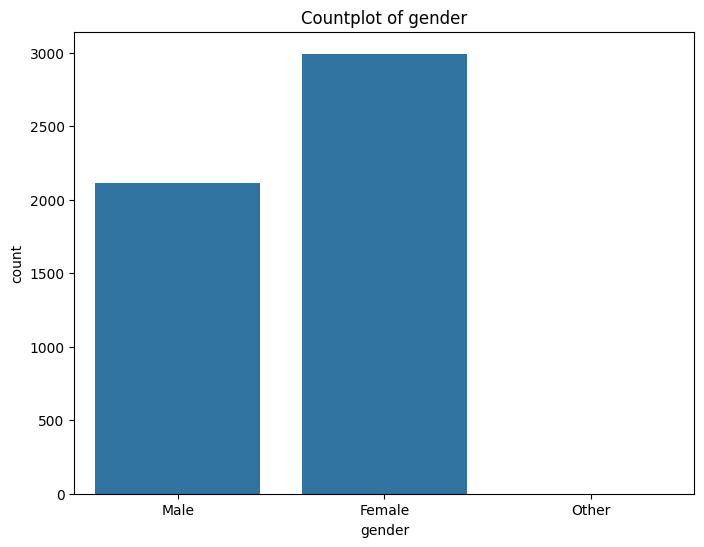

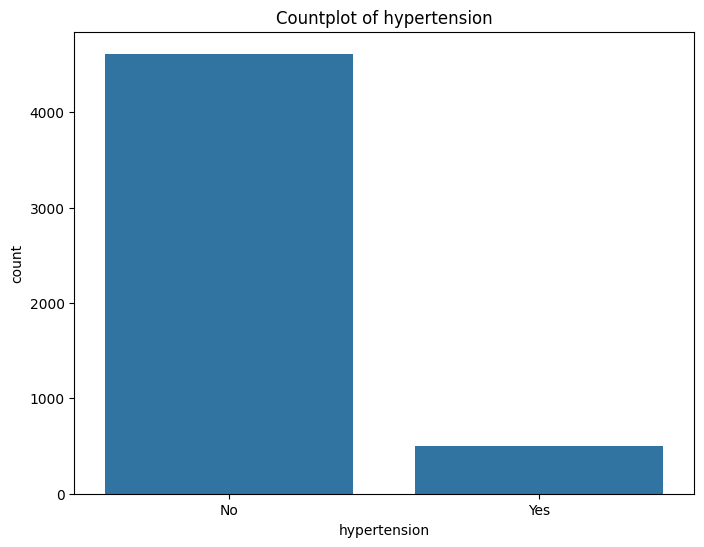

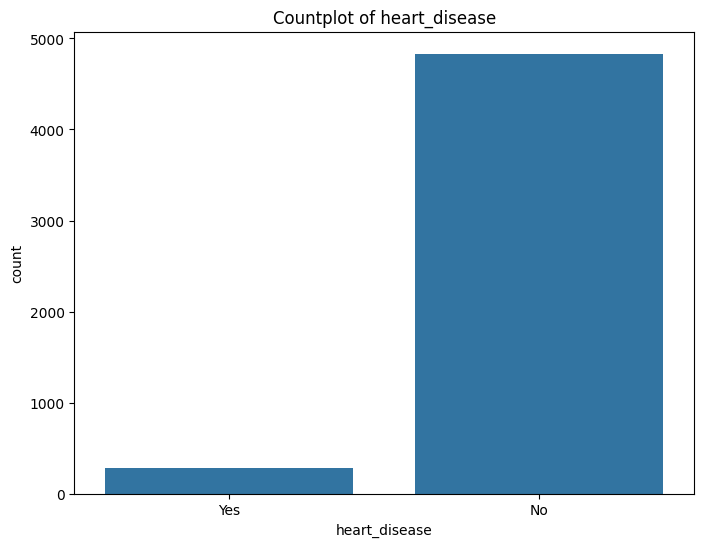

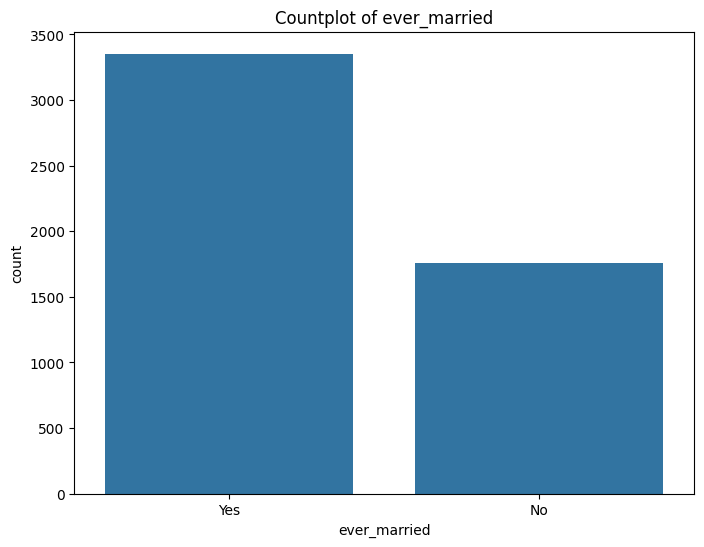

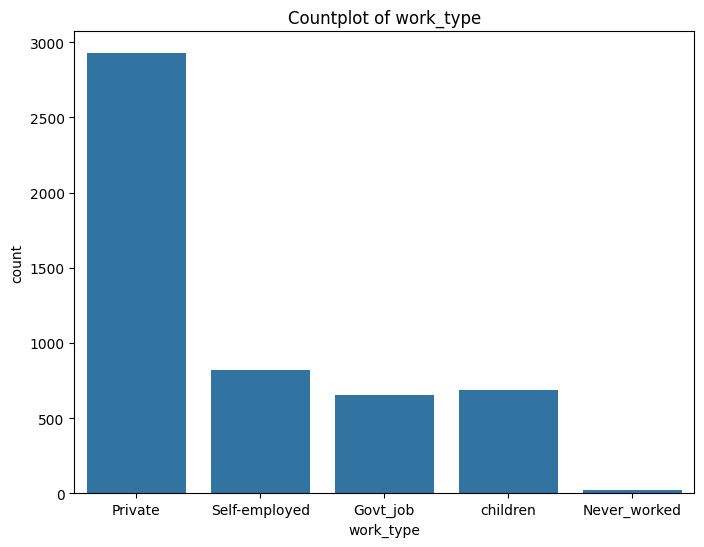

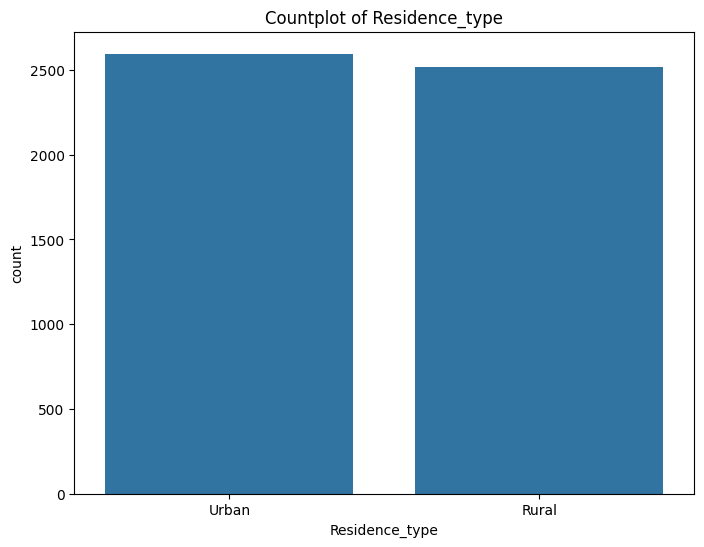

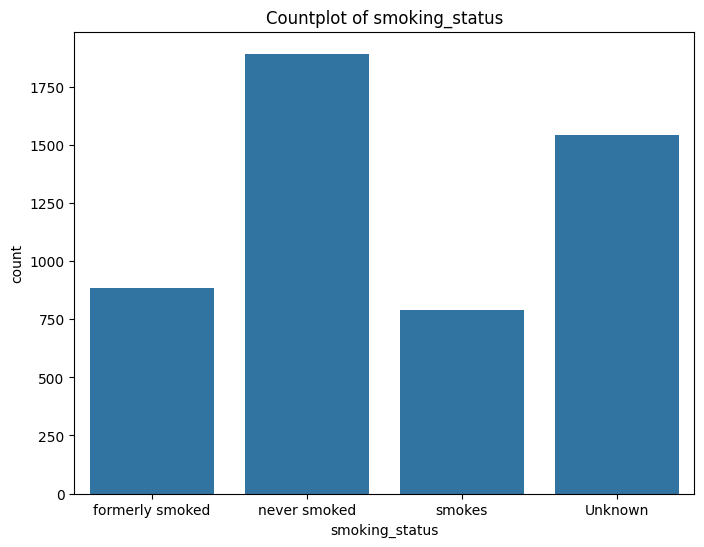

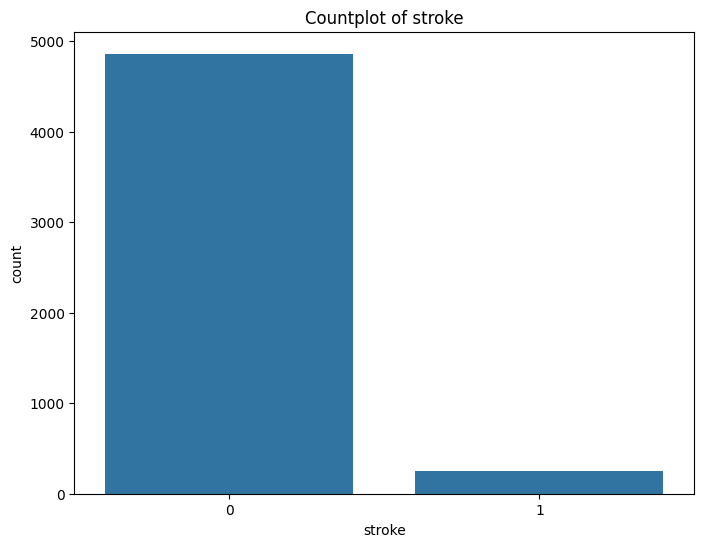

In [20]:
#countplot for categorical columns

import seaborn as sns
import matplotlib.pyplot as plt

# Set up a loop to create countplots for each categorical column
for column in df_stroke_categorical:
    plt.figure(figsize=(8, 6))  # Set the size of each individual plot
    sns.countplot(x=column, data=df_stroke_categorical)  # Create the countplot for the current column
    plt.title(f'Countplot of {column}')  # Set the title of the plot
    plt.xlabel(column)  # Set the label for the x-axis
    plt.show()  # Display the plot

In [21]:
# the data is imbalanced with more cases of people having stroke than not having stroke
# most people in the study smoke or their smoking status is undisclosed
# Most people in the study work privately
# Most people in the study have been married and have no history of heart disease
# most people in the study have no history of hypertension
# there are mostly woman in the study

In [22]:
# examine how gender variable relates to the target
pd.crosstab(df_stroke_categorical['gender'], df_stroke_categorical['stroke'], normalize='index')

stroke,0,1
gender,,
Female,0.952906,0.047094
Male,0.948936,0.051064
Other,1.000000,0.000000


In [23]:
# examine how hypertension variable relates to the target
pd.crosstab(df_stroke_categorical['hypertension'], df_stroke_categorical['stroke'], normalize='index')

stroke,0,1
hypertension,,
No,0.960321,0.039679
Yes,0.867470,0.132530


In [24]:
# examine how heart_disease variable relates to the target
pd.crosstab(df_stroke_categorical['heart_disease'], df_stroke_categorical['stroke'], normalize='index')

stroke,0,1
heart_disease,,
No,0.958213,0.041787
Yes,0.829710,0.170290


In [25]:
# heart disease has a strong relation to stroke

In [26]:
# examine how ever_married variable relates to the target
pd.crosstab(df_stroke_categorical['ever_married'], df_stroke_categorical['stroke'], normalize='index')

stroke,0,1
ever_married,,
No,0.983495,0.016505
Yes,0.934387,0.065613


In [27]:
# examine how smoking_status variable relates to the target
pd.crosstab(df_stroke_categorical['smoking_status'], df_stroke_categorical['stroke'], normalize='index')

stroke,0,1
smoking_status,,
Unknown,0.969560,0.030440
formerly smoked,0.920904,0.079096
never smoked,0.952431,0.047569
smokes,0.946768,0.053232


In [28]:
# examine how Residence_type variable relates to the target
pd.crosstab(df_stroke_categorical['Residence_type'], df_stroke_categorical['stroke'], normalize='index')

stroke,0,1
Residence_type,,
Rural,0.954654,0.045346
Urban,0.947997,0.052003


In [29]:
#now seperate the numerical data into dataframe

df_stroke_numeric = df_stroke[['age','bmi','avg_glucose_level']]

df_stroke_numeric.describe()

,age,bmi,avg_glucose_level
count,5110.000000,4909.000000,5110.000000
mean,43.226614,28.893237,106.147677
std,22.612647,7.854067,45.283560
min,0.080000,10.300000,55.120000
25%,25.000000,23.500000,77.245000
50%,45.000000,28.100000,91.885000
75%,61.000000,33.100000,114.090000
max,82.000000,97.600000,271.740000


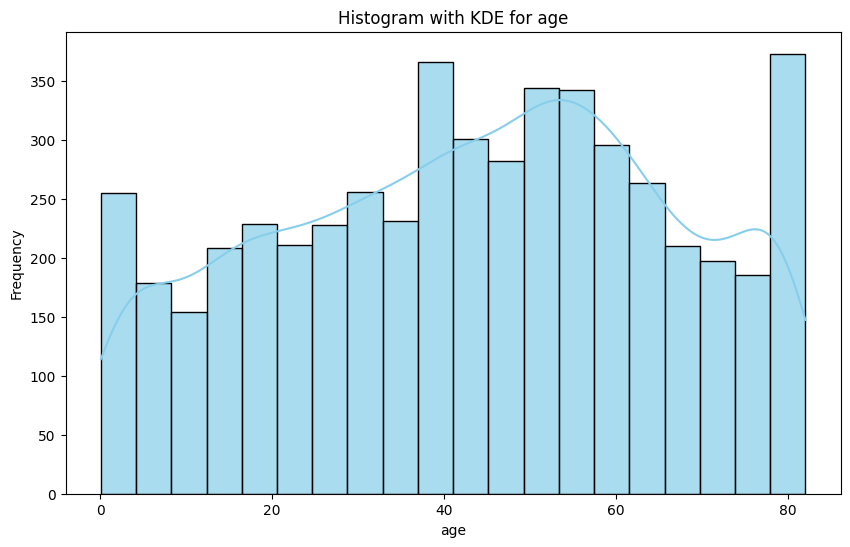

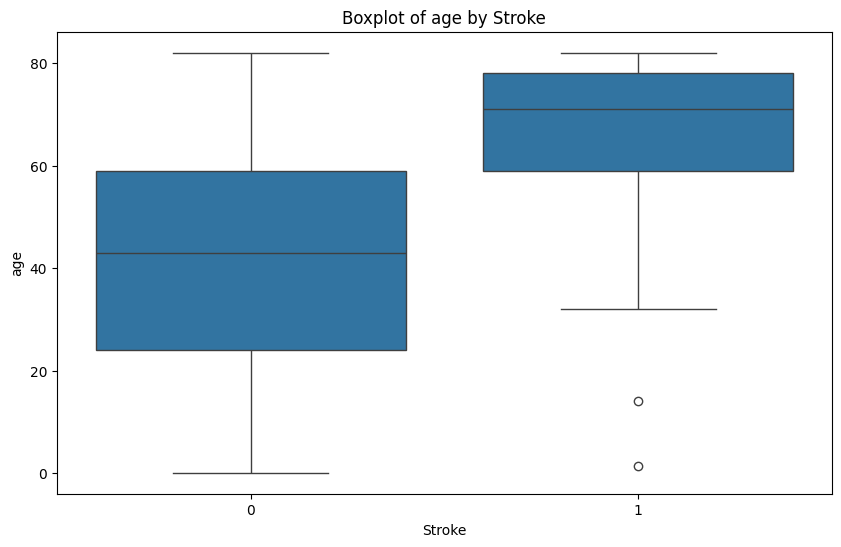

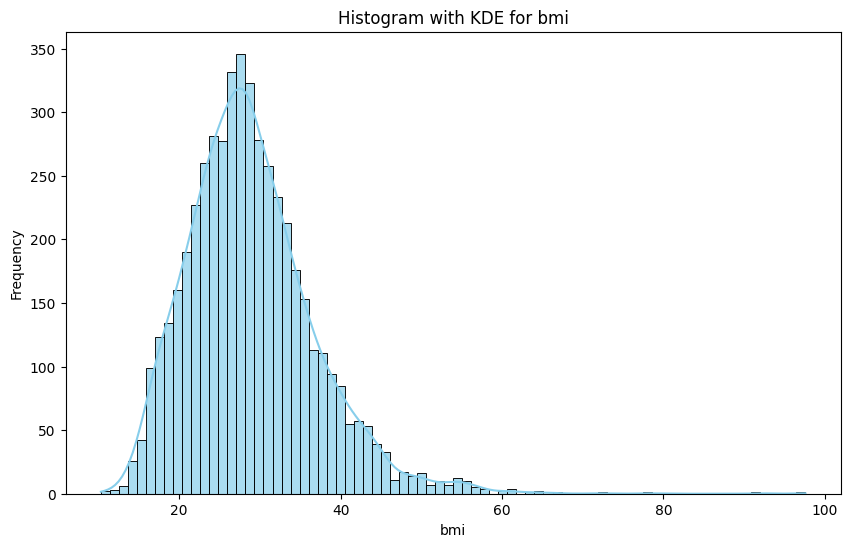

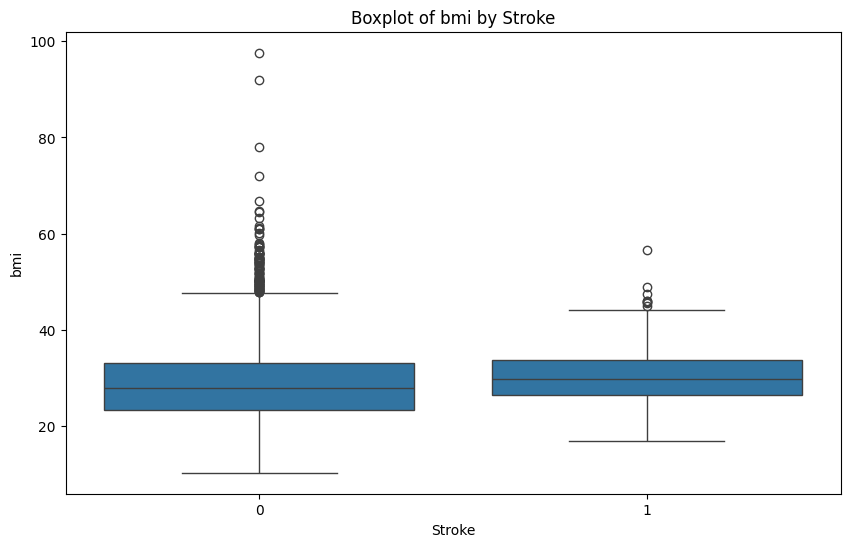

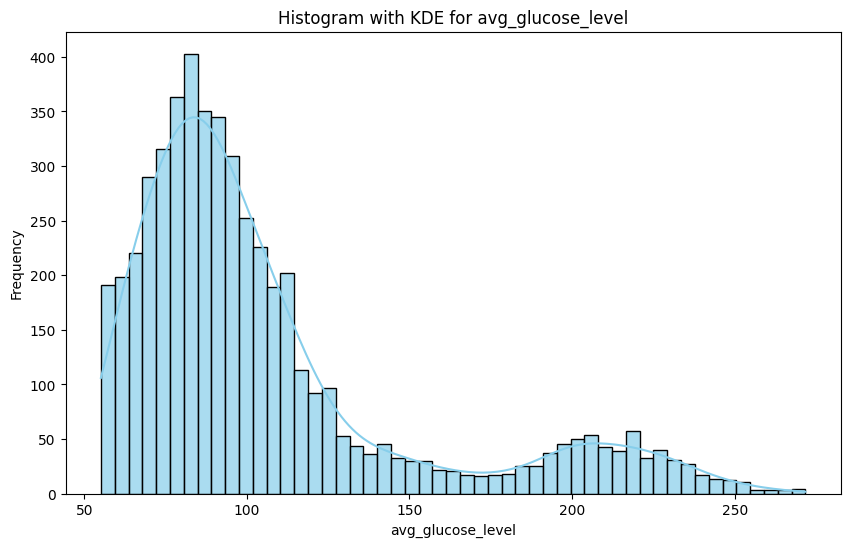

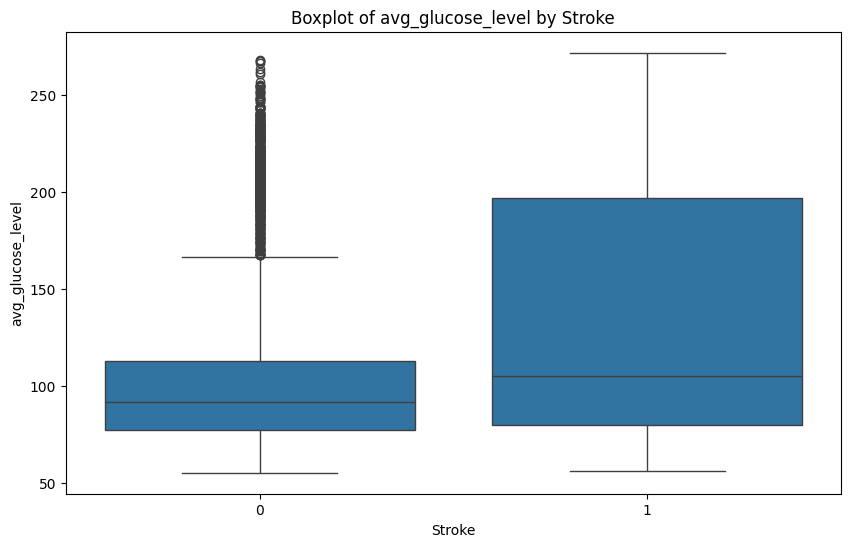

In [30]:
# plot histogram or barplots to visualize numeric data
# Loop over each numeric column in df_stroke_categorical to create visualizations
for column in df_stroke_numeric.columns:
    plt.figure(figsize=(10, 6))  # Set the size of each individual plot
    
    # Plot a histogram with kernel density estimation (kde) for numeric data
    sns.histplot(data=df_stroke_numeric, x=column, kde=True, color='skyblue', alpha=0.7)
    plt.title(f'Histogram with KDE for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    
    # Plot boxplot to visualize the relationship with the 'stroke' column
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_stroke_categorical['stroke'], y=column, data=df_stroke_numeric)
    plt.title(f'Boxplot of {column} by Stroke')
    plt.xlabel('Stroke')
    plt.ylabel(column)
    plt.show()
    

In [31]:
# determine pairwise correlations
df_stroke_numeric.corr()

,age,bmi,avg_glucose_level
age,1.000000,0.333398,0.238171
bmi,0.333398,1.000000,0.175502
avg_glucose_level,0.238171,0.175502,1.000000


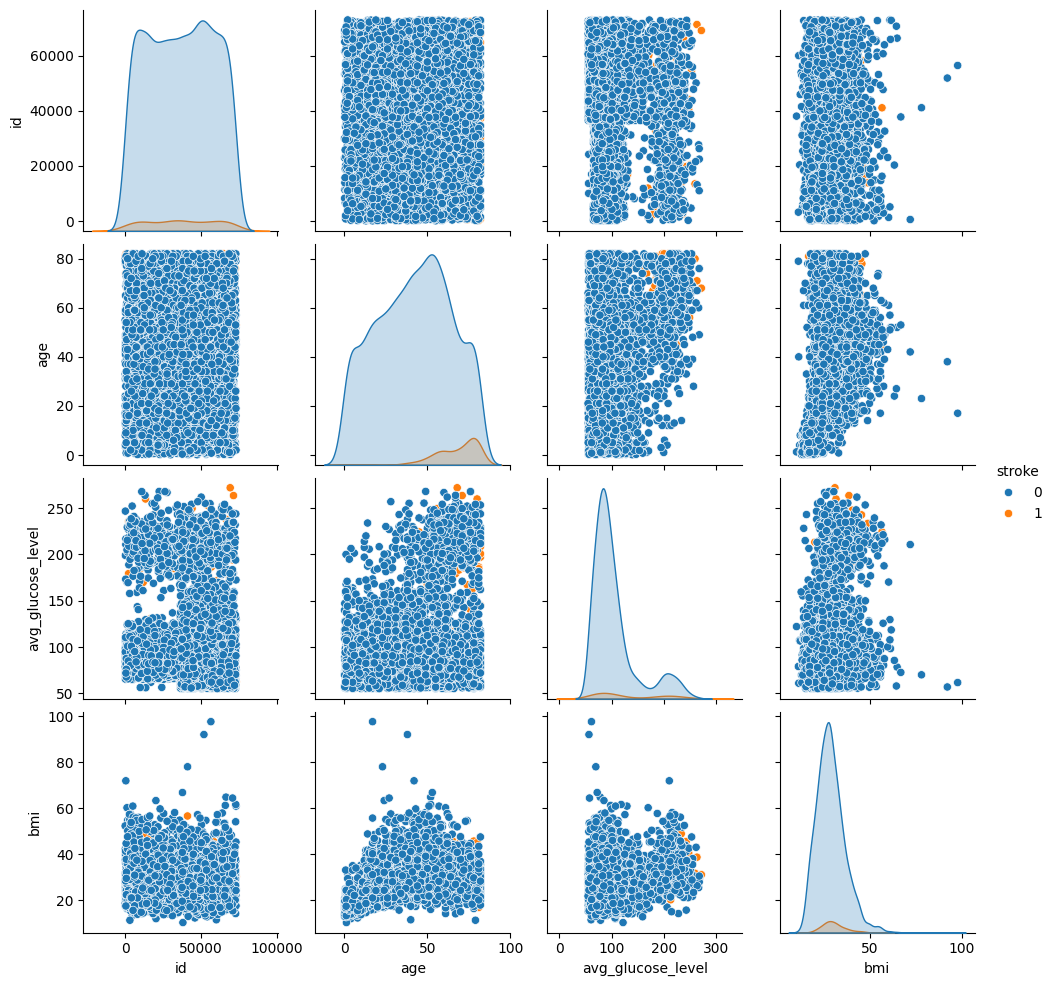

In [32]:
# combined analysis categorical and numerical 

sns.pairplot(df_stroke, hue='stroke')
plt.show()

## 4: Data Preparation (Python or SQL)

####               4.1. Data Imputation & Cleaning

In [35]:
# find a summary of the dataset
import pandas as pd
pd.set_option('display.max_rows', 40)
df_stroke.info()

# all columns have non-null values
# no issue with dealing with non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   object 
 4   heart_disease      5110 non-null   object 
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 479.2+ KB


In [36]:
nan_counts = df_stroke.isna().sum()

# Display the counts of NaN values for each column
print("NaN counts per column:")
print(nan_counts)

#all nan's have been removed

NaN counts per column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [37]:
# need to address the Nan values in the BMI column
# very difficult to establish BMI's of missing people so will need to drop all rows from dataset

# Drop rows with NaN values in the 'value' column (modify inplace)
df_stroke.dropna(subset=['bmi'], inplace=True)



In [38]:
# lets convert the gender column to numeric values using lable encoder
from sklearn.preprocessing import OneHotEncoder

# use one-hot coding instead of labelencoder to preserve categories and relationships
#label-encoder is for ordinate data - treats data has having order which may not be representative of actual impact of each variable

# Use oneHotEncoder to convert 'gender','hypertension' and 'heart_disease',"Residence_type columns to 0 and 1

one_hot_encoder = OneHotEncoder(sparse_output=False)
encoded_features = one_hot_encoder.fit_transform(df_stroke[['gender','smoking_status','hypertension','work_type','Residence_type','ever_married','heart_disease']])
encoded_df = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out(['gender','smoking_status','hypertension','work_type','Residence_type','ever_married','heart_disease']))

df_stroke.reset_index(drop=True, inplace=True)   # this prevents nan's aligns dataframes
encoded_df.reset_index(drop=True, inplace=True)


# Concatenate the original DataFrame (df_stroke) with the encoded DataFrame (encoded_df) along the column axis
df_stroke = pd.concat([df_stroke, encoded_df], axis=1)
df_stroke


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,gender_Other,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension_No,hypertension_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,ever_married_No,ever_married_Yes,heart_disease_No,heart_disease_Yes
0,9046,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,31112,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,60182,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,1665,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,56669,Male,81.0,No,No,Yes,Private,Urban,186.21,29.0,formerly smoked,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,14180,Female,13.0,No,No,No,children,Rural,103.08,18.6,Unknown,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4905,44873,Female,81.0,No,No,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4906,19723,Female,35.0,No,No,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4907,37544,Male,51.0,No,No,Yes,Private,Rural,166.29,25.6,formerly smoked,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


####               4.2. Feature Engineering (addition and reduction)

In [40]:
# drop categorical columns
df_stroke.drop(['id','hypertension','smoking_status','work_type','Residence_type','ever_married','gender','heart_disease'],axis=1,inplace=True)
df_stroke

,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension_No,hypertension_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,ever_married_No,ever_married_Yes,heart_disease_No,heart_disease_Yes
0,67.0,228.69,36.6,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,80.0,105.92,32.5,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,49.0,171.23,34.4,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,79.0,174.12,24.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,81.0,186.21,29.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,13.0,103.08,18.6,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4905,81.0,125.20,40.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4906,35.0,82.99,30.6,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4907,51.0,166.29,25.6,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


#### 4.3. Outlier Identification and Removal

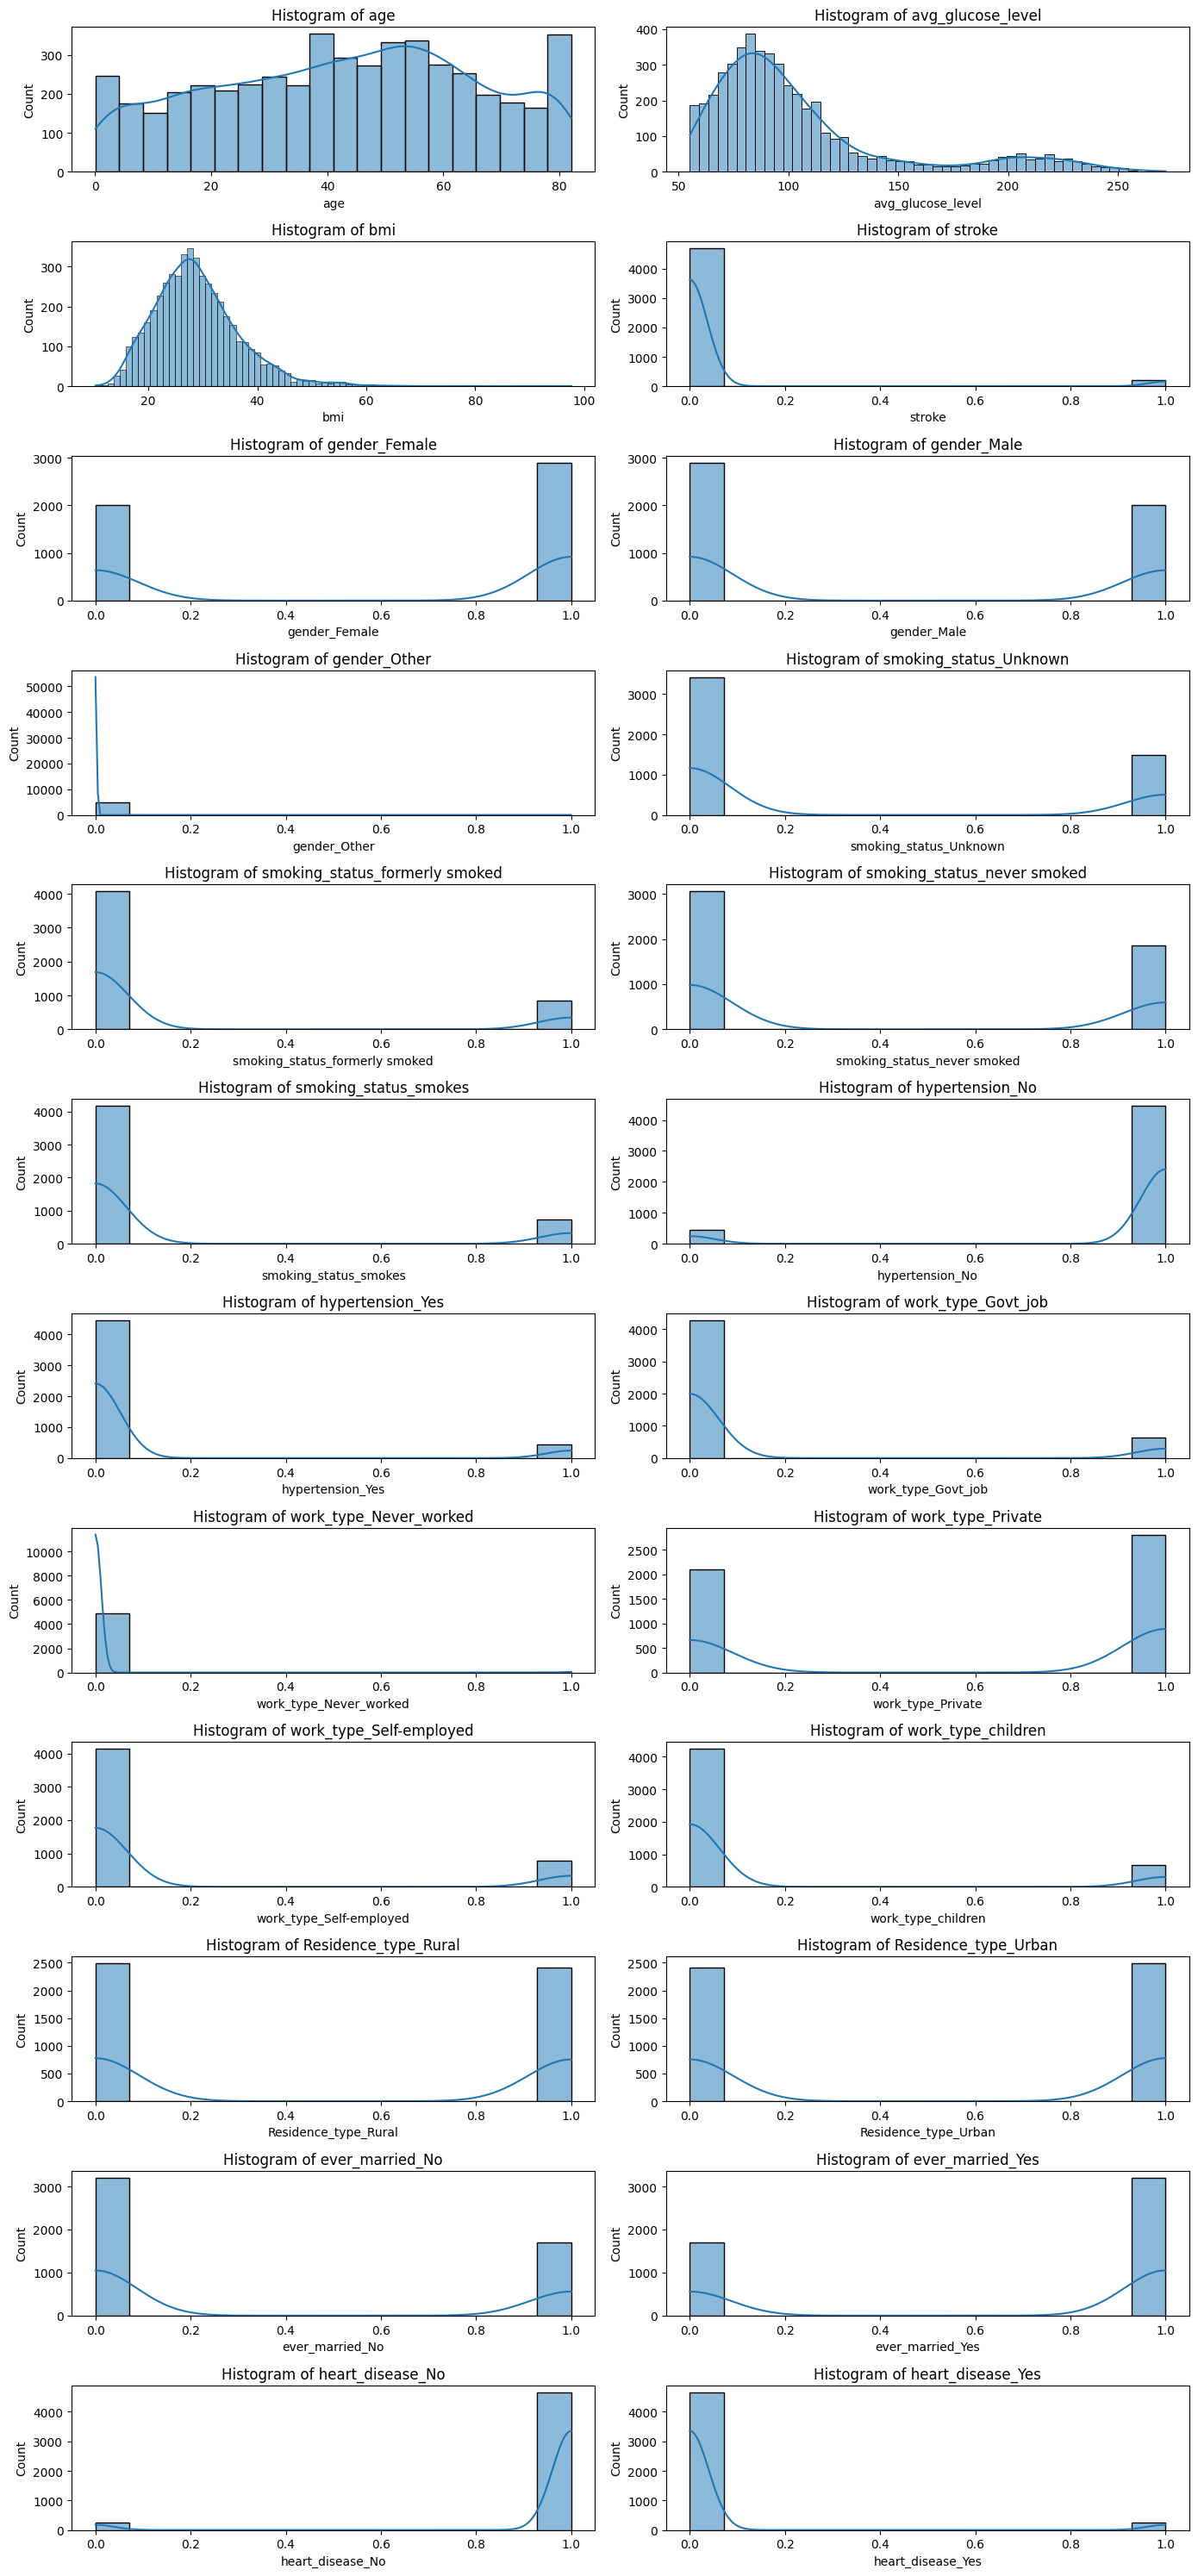

In [42]:
# plot a histogram of the features 
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_stroke is your DataFrame with multiple columns
num_cols = len(df_stroke.columns)
num_rows = (num_cols + 1) // 2  # Calculate number of rows needed for subplot layout

plt.figure(figsize=(14, 30))
for i, col in enumerate(df_stroke.columns):
    plt.subplot(num_rows, 2, i + 1)
    sns.histplot(df_stroke[col], kde=True)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()


In [43]:
import pandas as pd

# Define features and target
X = df_stroke[['age', 'avg_glucose_level', 'bmi']]  # Numerical features
y = df_stroke['stroke']  # Target column

# Compute Q1 (25th percentile) and Q3 (75th percentile) for numerical features
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows with outliers
is_outlier = ((X < lower_bound) | (X > upper_bound)).any(axis=1)
df_cleaned = df_stroke[~is_outlier]

# If you also want to keep the target column in df_cleaned
df_cleaned = pd.concat([df_cleaned[['age', 'avg_glucose_level', 'bmi']], df_stroke['stroke']], axis=1)

# Display the cleaned DataFrame
print(df_cleaned)



       age  avg_glucose_level   bmi  stroke
1     80.0             105.92  32.5       1
5     74.0              70.09  27.4       1
6     69.0              94.39  22.8       1
7     78.0              58.57  24.2       1
8     81.0              80.43  29.7       1
...    ...                ...   ...     ...
4863   NaN                NaN   NaN       0
4864   NaN                NaN   NaN       0
4865   NaN                NaN   NaN       0
4866   NaN                NaN   NaN       0
4878   NaN                NaN   NaN       0

[4909 rows x 4 columns]


In [44]:
df_stroke.shape

# as can be seen outliers have been removed

(4909, 24)

#### 4.4. Normalize the data

In [46]:
#normalization should only be applied to the numerical columns and not the categorical (0,1) columns

from sklearn.preprocessing import StandardScaler


# Separate features (X) and target (y) done above

# Assuming X is your feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Convert scaled array (X_scaled) back to a DataFrame
X_scaled_df = pd.DataFrame(data=X_scaled, columns=X.columns)
X_scaled_df



,age,avg_glucose_level,bmi
0,1.070138,2.777698,0.981345
1,1.646563,0.013842,0.459269
2,0.272012,1.484132,0.701207
3,1.602222,1.549193,-0.623083
4,1.690903,1.821368,0.013595
...,...,...,...
4904,-1.324241,-0.050094,-1.310695
4905,1.690903,0.447882,1.414286
4906,-0.348753,-0.502369,0.217332
4907,0.360692,1.372920,-0.419346


In [47]:
#concatenate the normalized numerical X's with the remaining columns and target column

df_stroke_normal= pd.concat([X_scaled_df.reset_index(drop=True), y.reset_index(drop=True)], axis=1)
df_stroke_normal

,age,avg_glucose_level,bmi,stroke
0,1.070138,2.777698,0.981345,1
1,1.646563,0.013842,0.459269,1
2,0.272012,1.484132,0.701207,1
3,1.602222,1.549193,-0.623083,1
4,1.690903,1.821368,0.013595,1
...,...,...,...,...
4904,-1.324241,-0.050094,-1.310695,0
4905,1.690903,0.447882,1.414286,0
4906,-0.348753,-0.502369,0.217332,0
4907,0.360692,1.372920,-0.419346,0


#### 4.5. Dimensional Reduction (PCA)

In [49]:
#from sklearn.decomposition import PCA

# identify optimum number of components
# PCA will not be done as there are already few numerical dimensions, below just highlights process in comments

#pca = PCA().fit(X_scaled)
#explained_variance = pca.explained_variance_ratio_
#plt.plot(explained_variance)
#plt.xlabel('Component')
#plt.ylabel('Explained Variance Ratio')
#plt.show()

#based on elbow method will need 8 components

In [50]:

# Applying PCA
#pca = PCA(n_components=8)  # Choose the number of components based on elblow plot
#df_pca = pca.fit_transform(X)
#df_pca


# convert back into data frame

# Create a DataFrame from the PCA components
#columns = [f"PC{i+1}" for i in range(df_pca.shape[1])]  # Name for each PC
#df_pca_components = pd.DataFrame(data=df_pca, columns=columns)

# now concatenate the components with the target column

#df_stroke_PCA = pd.concat([df_pca_components.reset_index(drop=True), y.reset_index(drop=True)], axis=1)
#df_stroke_PCA

## 5: Dealing With Imbalanced Datsets

In [52]:
# Count the outcomes to see if data is a balanced

df_stroke_normal.value_counts('stroke')
# data is imbalanced and shows a greater weighting towards people that don't have stroke vs those that did have stroke

stroke
0    4700
1     209
Name: count, dtype: int64

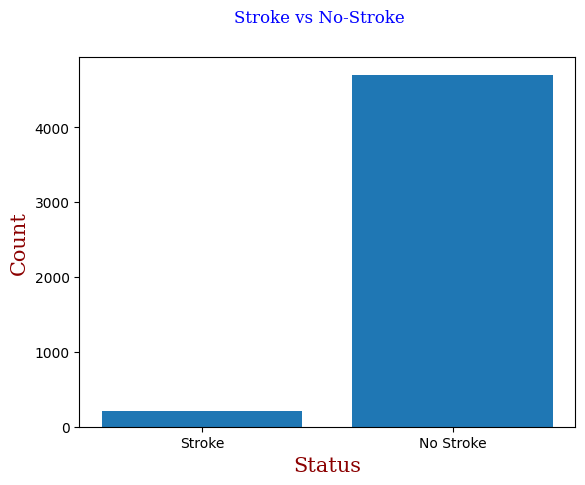

In [53]:
# dealing with the imbalanced data set
# Examine how imbalanced the dataset is by drawing a simple bar graph. Use the plot method to do this with pandas

import matplotlib.pyplot as plt  # import pyplot to draw bar graph
import numpy as np   # import numpy module

#create numpy arrays
x = np.array(['Stroke','No Stroke'])
y = np.array([209,4700])

font1 = {'family':'serif','color':'blue','fontsize':10}       # These parameters set font style and size for titles and axis
font2 = {'family':'serif','color':'darkred','fontsize':15}

plt.suptitle("Stroke vs No-Stroke",fontdict = font1)     #fontdict assigns specified font styles to heading 
plt.xlabel("Status",fontdict = font2) # assign x label
plt.ylabel("Count",fontdict = font2) # assign y label

plt.bar(x,y)   # assign x and y to bar graph function
plt.show()     # plot the function

In [54]:
# install imblearn using pip

!pip install imbalanced-learn

In [55]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE



# Separate features (X) and target (y)
X = df_stroke_normal.drop('stroke', axis=1)  # Features
y = df_stroke_normal['stroke']  # Target

# Split the dataset into training and testing sets (needs to be done before balancing dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

# Split the training set into validation and train set
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train, test_size=0.2,stratify=y_train, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_1, y_train_1)





In [56]:
# Count the outcomes to see if data is a balanced

print(pd.Series(y_train_resampled).value_counts())  # pd.series is for handling one dimensional data in pandas
# can see that SMOTE indeed balanced the dataset

stroke
0    3007
1    3007
Name: count, dtype: int64


## 6: Model Development

#### 6.1. Split train into train and validation set

Splitting already done prior

#### 6.2. Model Training and Tuning

#### 6.2.1.XGBoost

In [62]:
# Model 1: XGB Classifier
# install XGBoost
!pip3 install xgboost



In [63]:
from xgboost import XGBClassifier  # different library from sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb=XGBClassifier()    #call model
# Initialize GridSearchCV with parameters and cross-validation
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
xgb_grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=k_fold, scoring='f1_weighted')

# Fit GridSearchCV to training data
xgb_grid.fit(X_train_resampled, y_train_resampled)

# Evaluate the best estimator on the validation set (X_val, y_val) and see if need to tune parameters more before evaluation phase
Accuracy = xgb_grid.best_estimator_.score(X_val, y_val)  # only measure that doesn't require you to calculate y_pred

# Predict labels on the validation set
y_pred_val = xgb_grid.best_estimator_.predict(X_val)
 

Precision = precision_score(y_val, y_pred_val, average='weighted',zero_division=1) 
Recall = recall_score(y_val, y_pred_val, average='weighted',zero_division=1)
f1 = f1_score(y_val, y_pred_val, average='weighted',zero_division=1)


# Display best parameters and best estimator
print(xgb_grid.best_params_)
print(xgb_grid.best_estimator_)
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("f1:", f1)



{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)
Accuracy: 0.910941475826972
Precision: 0.926183450061681
Recall: 0.910941475826972
f1: 0.9183162617931768


In [64]:
# check against the train set for overfitting and underfitting

Accuracy = xgb_grid.best_estimator_.score(X_train_resampled, y_train_resampled)  
y_pred = xgb_grid.best_estimator_.predict(X_train_resampled)
 

Precision = precision_score(y_train_resampled, y_pred, average='weighted',zero_division=1) 
Recall = recall_score(y_train_resampled, y_pred, average='weighted',zero_division=1)
f1 = f1_score(y_train_resampled, y_pred, average='weighted',zero_division=1)


# Display best parameters and best estimator
print(xgb_grid.best_params_)
print(xgb_grid.best_estimator_)
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("f1:", f1)

{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)
Accuracy: 0.9936814100432324
Precision: 0.9936814100432324
Recall: 0.9936814100432324
f1: 0.9936814100432324


In [65]:
# do learning curve to see effect of dataset

#### 6.2.2.Log Regression

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l2']  # Regularization type
}

# Instantiate Logistic Regression model
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)

# Initialize GridSearchCV with parameters and cross-validation
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
log_reg_grid = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=k_fold, scoring='f1_weighted')

# Fit GridSearchCV to training data
log_reg_grid.fit(X_train_resampled, y_train_resampled)

# Evaluate the best estimator on the validation set (X_val, y_val)
accuracy = log_reg_grid.best_estimator_.score(X_val, y_val)

# Predict labels on the validation set
y_pred_val = log_reg_grid.best_estimator_.predict(X_val)

# Compute precision, recall, and f1-score on the validation set
precision = precision_score(y_val, y_pred_val, average='weighted', zero_division=1)
recall = recall_score(y_val, y_pred_val, average='weighted', zero_division=1)
f1 = f1_score(y_val, y_pred_val, average='weighted', zero_division=1)

# Display best parameters and best estimator
print("Best Parameters:", log_reg_grid.best_params_)
print("Best Estimator:", log_reg_grid.best_estimator_)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Best Parameters: {'C': 0.001, 'penalty': 'l2'}
Best Estimator: LogisticRegression(C=0.001, max_iter=1000)
Accuracy: 0.7201017811704835
Precision: 0.9615772196936729
Recall: 0.7201017811704835
F1 Score: 0.8038404672976458


In [68]:
# check against the train set for overfitting and underfitting

Accuracy = log_reg_grid.best_estimator_.score(X_train_resampled, y_train_resampled)  
y_pred = log_reg_grid.best_estimator_.predict(X_train_resampled)
 

Precision = precision_score(y_train_resampled, y_pred, average='weighted',zero_division=1) 
Recall = recall_score(y_train_resampled, y_pred, average='weighted',zero_division=1)
f1 = f1_score(y_train_resampled, y_pred, average='weighted',zero_division=1)


# Display best parameters and best estimator
print(log_reg_grid.best_params_)
print(log_reg_grid.best_estimator_)
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("f1:", f1)

{'C': 0.001, 'penalty': 'l2'}
LogisticRegression(C=0.001, max_iter=1000)
Accuracy: 0.7647156634519454
Precision: 0.7661533014692866
Recall: 0.7647156634519454
f1: 0.7643975093132199


#### 6.2.3.Random Forests

In [70]:
from sklearn.ensemble import RandomForestClassifier
# Define the parameters grid for Random Forest
parameters = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with parameters and cross-validation (e.g., KFold)
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_grid = GridSearchCV(rf, parameters, cv=k_fold,scoring='f1_weighted')

# Fit GridSearchCV to filtered training data (X_val should be the training data, y_val should be the labels)
rf_grid.fit(X_train_resampled, y_train_resampled)

# Evaluate the best estimator on the validation set (X_val, y_val) and see if need to tune parameters more before evaluation phase
Accuracy = rf_grid.best_estimator_.score(X_val, y_val)  # only measure that doesn't require you to calculate y_pred

# Predict labels on the test set
y_pred_val = rf_grid.best_estimator_.predict(X_val)
 

Precision = precision_score(y_val, y_pred_val, average='weighted',zero_division=1) 
Recall = recall_score(y_val, y_pred_val, average='weighted',zero_division=1)
f1 = f1_score(y_val, y_pred_val, average='weighted')


# Display best parameters and best estimator
print(rf_grid.best_params_)
print(rf_grid.best_estimator_)
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("f1:", f1)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestClassifier(random_state=42)
Accuracy: 0.8740458015267175
Precision: 0.9229965368749258
Recall: 0.8740458015267175
f1: 0.8970389767401205


In [71]:
# lets do a test for overfitting and underfitting
# will do this by comparing the perfomance of the train set and the validation set


Accuracy = rf_grid.best_estimator_.score(X_train_resampled, y_train_resampled)  
y_pred = rf_grid.best_estimator_.predict(X_train_resampled)
 

Precision = precision_score(y_train_resampled, y_pred, average='weighted',zero_division=1) 
Recall = recall_score(y_train_resampled, y_pred, average='weighted',zero_division=1)
f1 = f1_score(y_train_resampled, y_pred, average='weighted',zero_division=1)


# Display best parameters and best estimator
print(rf_grid.best_params_)
print(rf_grid.best_estimator_)
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("f1:", f1)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestClassifier(random_state=42)
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1: 1.0


##### 6.2.4. K Nearest Neighbours

In [73]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'p': [1, 2]  # Distance metric: 1 (Manhattan distance), 2 (Euclidean distance)
}

# Instantiate KNN Model
knn = KNeighborsClassifier()

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
knn_grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=k_fold, scoring='f1_weighted')

knn_grid.fit(X_train_resampled, y_train_resampled)


accuracy = knn_grid.best_estimator_.score(X_val, y_val)

y_pred_val = knn_grid.best_estimator_.predict(X_val)

precision = precision_score(y_val, y_pred_val, average='weighted', zero_division=1)
recall = recall_score(y_val, y_pred_val, average='weighted', zero_division=1)
f1 = f1_score(y_val, y_pred_val, average='weighted', zero_division=1)


# Display best parameters and best estimator
print(knn_grid.best_params_)
print(knn_grid.best_estimator_)
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("f1:", f1)

{'n_neighbors': 3, 'p': 2}
KNeighborsClassifier(n_neighbors=3)
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1: 0.8570455342331268


In [74]:
# lets do a test for overfitting and underfitting
# will do this by comparing the perfomance of the train set and the validation set


Accuracy = knn_grid.best_estimator_.score(X_train_resampled, y_train_resampled)  
y_pred = knn_grid.best_estimator_.predict(X_train_resampled)
 

Precision = precision_score(y_train_resampled, y_pred, average='weighted',zero_division=1) 
Recall = recall_score(y_train_resampled, y_pred, average='weighted',zero_division=1)
f1 = f1_score(y_train_resampled, y_pred, average='weighted',zero_division=1)


# Display best parameters and best estimator
print(knn_grid.best_params_)
print(knn_grid.best_estimator_)
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("f1:", f1)

{'n_neighbors': 3, 'p': 2}
KNeighborsClassifier(n_neighbors=3)
Accuracy: 0.9464582640505487
Precision: 0.9497692882334492
Recall: 0.9464582640505487
f1: 0.946359544078229


#### 6.2.5.Artificial Neural Network (ANN)

In [76]:
# lets use Keras within tensorflow to create a ANN model to see how well it performs


import tensorflow as tf
from tensorflow.keras.models import Sequential #keras model that allows linear layer stacking
# dense is a fully connected layer where each neuron in the layer is connected to every neuron in previous layer
# input defines the shape of input data
from tensorflow.keras.layers import Dense, Input


# Define the model using Keras API in TensorFlow
model = Sequential([
    Input(shape=(X_train_resampled.shape[1],)),  # Define input shape with Input layer
    # Hidden layer with 64 neurons & relu activation  function
    #Relu introduces non-linearity and accelerates convergence
    Dense(64, activation='relu'),  
    Dense(32, activation='relu'),  # Another hidden layer with 32 neurons and relu activation function
    # Output layer for binary classification with single neuron and sigmoid activation function
    Dense(1, activation='sigmoid')  
])

# Compile the model
# optimizer (adam - adaptive moment estimation)
# adam adjusts the learning rate during training
# loss function measures the difference between predicted probability and actual label
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with validation data
model.fit(
    X_train_resampled, y_train_resampled,
    epochs=50, # number of times model will iterate over the entire dataset
    #no of samples per gradient update-smaller gradients noisier but helps model generalize
    batch_size=10, 
    validation_data=(X_val, y_val) # Use validation data
)

# Predict labels on the validation set
predicted_probabilities = model.predict(X_val)
threshold_value = 0.5  # Default threshold
# output is continuous so have to convert to discrete based on threshold value
y_pred_val = (predicted_probabilities > threshold_value).astype(int)  # Binary conversion

# Evaluate the model with validation set
test_loss, test_accuracy = model.evaluate(X_val, y_val)
Precision_ann = precision_score(y_val, y_pred_val, average='weighted', zero_division=1)
Recall_ann = recall_score(y_val, y_pred_val, average='weighted', zero_division=1)
f1_ann = f1_score(y_val, y_pred_val, average='weighted', zero_division=1)

# Display the performance metrics
print("Precision (RNN):", Precision_ann)
print("Recall (RNN):", Recall_ann)
print("F1-score (RNN):", f1_ann)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")



Epoch 1/50
602/602 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7661 - loss: 0.5026 - val_accuracy: 0.6908 - val_loss: 0.4981
Epoch 2/50
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7879 - loss: 0.4358 - val_accuracy: 0.7099 - val_loss: 0.4498
Epoch 3/50
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7786 - loss: 0.4482 - val_accuracy: 0.7061 - val_loss: 0.4406
Epoch 4/50
602/602 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7958 - loss: 0.4302 - val_accuracy: 0.6794 - val_loss: 0.4984
Epoch 5/50
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7923 - loss: 0.4395 - val_accuracy: 0.6616 - val_loss: 0.5021
Epoch 6/50
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7975 - loss: 0.4284 - val_accuracy: 0.6947 - val_loss: 0.4312
Epoch 7/50
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7945 - loss: 0.4326 - val_accuracy: 0.6616 - val_loss: 0.5027
Epoch 8/50
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7999 - loss: 0.4209 - val_accuracy: 0.

In [166]:
# test for overfitting and underfitting

# Predict labels on the test set
predicted_probabilities = model.predict(X_train_resampled)
threshold_value = 0.5  # Default threshold
# output is continuous so have to convert to discrete based on threshold value
y_pred_test = (predicted_probabilities > threshold_value).astype(int)  # Binary conversion

# Evaluate the model with validation set
test_loss, test_accuracy = model.evaluate(X_train_resampled, y_train_resampled)
Precision_ann = precision_score(y_train_resampled, y_pred_test, average='weighted', zero_division=1)
Recall_ann = recall_score(y_train_resampled, y_pred_test, average='weighted', zero_division=1)
f1_ann = f1_score(y_train_resampled, y_pred_test, average='weighted', zero_division=1)

# Display the performance metrics
print("Precision (RNN):", Precision_ann)
print("Recall (RNN):", Recall_ann)
print("F1-score (RNN):", f1_ann)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.8157 - loss: 0.3568
Precision (RNN): 0.863270036617786
Recall (RNN): 0.8574991686065846
F1-score (RNN): 0.8569309738871167
Test Accuracy: 85.75%


## 7: Model Evaluation

#### 7.1. Mean Accuracy

In [79]:
print('xgb_grid:',round(xgb_grid.best_estimator_.score(X_test, y_test),2))

xgb_grid: 0.91


#### 7.2. Classification Report


##### 7.2.1. Xgboost

In [82]:
from sklearn.metrics import classification_report

# Use the best estimator obtained from GridSearchCV
best_xgb = xgb_grid.best_estimator_

# Predict labels on the test set
predicted_labels = best_xgb.predict(X_test)

#can try to adjust thresholds - still doesn't improve positive case identification
#predicted_labels= model.predict_proba(X_test)[:, 1]
#threshold_value = 0.3
#y_pred_adjusted = (predicted_labels > threshold_value).astype(int)

# Generate a classification report
report = classification_report(y_test, predicted_labels, output_dict=True,zero_division=1)

# Convert the report dictionary to a DataFrame
df_report = pd.DataFrame(report).transpose()

# Adjust pandas display settings to show all columns
pd.set_option('display.max_columns', None)

# Print the report in table form with averages
print("Classification Report:")
print(df_report)

Classification Report:
              precision    recall  f1-score     support
0              0.960912  0.941489  0.951102  940.000000
1              0.098361  0.142857  0.116505   42.000000
accuracy       0.907332  0.907332  0.907332    0.907332
macro avg      0.529636  0.542173  0.533803  982.000000
weighted avg   0.924021  0.907332  0.915406  982.000000


The results shows that the positive class peforms poorly. This could be due to an imbalanced test set. Need to collect more data of positive class. 

##### 7.2.2. Log regression

In [85]:
from sklearn.metrics import classification_report

# Use the best estimator obtained from GridSearchCV
best_log_reg = log_reg_grid.best_estimator_

# Predict labels on the test set
predicted_labels = best_log_reg.predict(X_test)

#can try to adjust thresholds - still doesn't improve positive case identification
#predicted_labels= model.predict_proba(X_test)[:, 1]
#threshold_value = 0.3
#y_pred_adjusted = (predicted_labels > threshold_value).astype(int)

# Generate a classification report
report = classification_report(y_test, predicted_labels, output_dict=True,zero_division=1)

# Convert the report dictionary to a DataFrame
df_report = pd.DataFrame(report).transpose()

# Adjust pandas display settings to show all columns
pd.set_option('display.max_columns', None)

# Print the report in table form with averages
print("Classification Report:")
print(df_report)

Classification Report:
              precision    recall  f1-score     support
0              0.985673  0.731915  0.840049  940.000000
1              0.112676  0.761905  0.196319   42.000000
accuracy       0.733198  0.733198  0.733198    0.733198
macro avg      0.549175  0.746910  0.518184  982.000000
weighted avg   0.948335  0.733198  0.812517  982.000000


##### 7.2.3. Random Forest

In [87]:
from sklearn.metrics import classification_report

# Use the best estimator obtained from GridSearchCV
best_rf = rf_grid.best_estimator_

# Predict labels on the test set
predicted_labels = best_rf.predict(X_test)

#can try to adjust thresholds - still doesn't improve positive case identification
#predicted_labels= model.predict_proba(X_test)[:, 1]
#threshold_value = 0.3
#y_pred_adjusted = (predicted_labels > threshold_value).astype(int)

# Generate a classification report
report = classification_report(y_test, predicted_labels, output_dict=True,zero_division=1)

# Convert the report dictionary to a DataFrame
df_report = pd.DataFrame(report).transpose()

# Adjust pandas display settings to show all columns
pd.set_option('display.max_columns', None)

# Print the report in table form with averages
print("Classification Report:")
print(df_report)

Classification Report:
              precision    recall  f1-score    support
0              0.963004  0.913830  0.937773  940.00000
1              0.100000  0.214286  0.136364   42.00000
accuracy       0.883910  0.883910  0.883910    0.88391
macro avg      0.531502  0.564058  0.537068  982.00000
weighted avg   0.926094  0.883910  0.903497  982.00000


##### 7.2.4. K nearest neighbours

In [89]:
# Use the best estimator obtained from GridSearchCV
best_knn = knn_grid.best_estimator_

# Predict labels on the test set
predicted_labels = best_knn.predict(X_test)

#can try to adjust thresholds - still doesn't improve positive case identification
#predicted_labels= model.predict_proba(X_test)[:, 1]
#threshold_value = 0.3
#y_pred_adjusted = (predicted_labels > threshold_value).astype(int)

# Generate a classification report
report = classification_report(y_test, predicted_labels, output_dict=True,zero_division=1)

# Convert the report dictionary to a DataFrame
df_report = pd.DataFrame(report).transpose()

# Adjust pandas display settings to show all columns
pd.set_option('display.max_columns', None)

# Print the report in table form with averages
print("Classification Report:")
print(df_report)

Classification Report:
              precision    recall  f1-score     support
0              0.968331  0.845745  0.902896  940.000000
1              0.099379  0.380952  0.157635   42.000000
accuracy       0.825866  0.825866  0.825866    0.825866
macro avg      0.533855  0.613349  0.530266  982.000000
weighted avg   0.931166  0.825866  0.871021  982.000000


#### 7.2.5. ANN

In [91]:
# Predict labels on the test set
predicted_probabilities = model.predict(X_test)
threshold_value = 0.5  # Default threshold
# output is continuous so have to convert to discrete based on threshold value
predicted_labels = (predicted_probabilities > threshold_value).astype(int)  # Binary conversion

#can try to adjust thresholds - still doesn't improve positive case identification
#predicted_labels= model.predict_proba(X_test)[:, 1]
#threshold_value = 0.3
#y_pred_adjusted = (predicted_labels > threshold_value).astype(int)

# Generate a classification report
report = classification_report(y_test, predicted_labels, output_dict=True,zero_division=1)

# Convert the report dictionary to a DataFrame
df_report = pd.DataFrame(report).transpose()

# Adjust pandas display settings to show all columns
pd.set_option('display.max_columns', None)

# Print the report in table form with averages
print("Classification Report:")
print(df_report)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:
              precision    recall  f1-score     support
0              0.978864  0.788298  0.873306  940.000000
1              0.115556  0.619048  0.194757   42.000000
accuracy       0.781059  0.781059  0.781059    0.781059
macro avg      0.547210  0.703673  0.534031  982.000000
weighted avg   0.941940  0.781059  0.844284  982.000000


#### 7.3. Confusion Matrix

##### 7.3.1. XgBoost

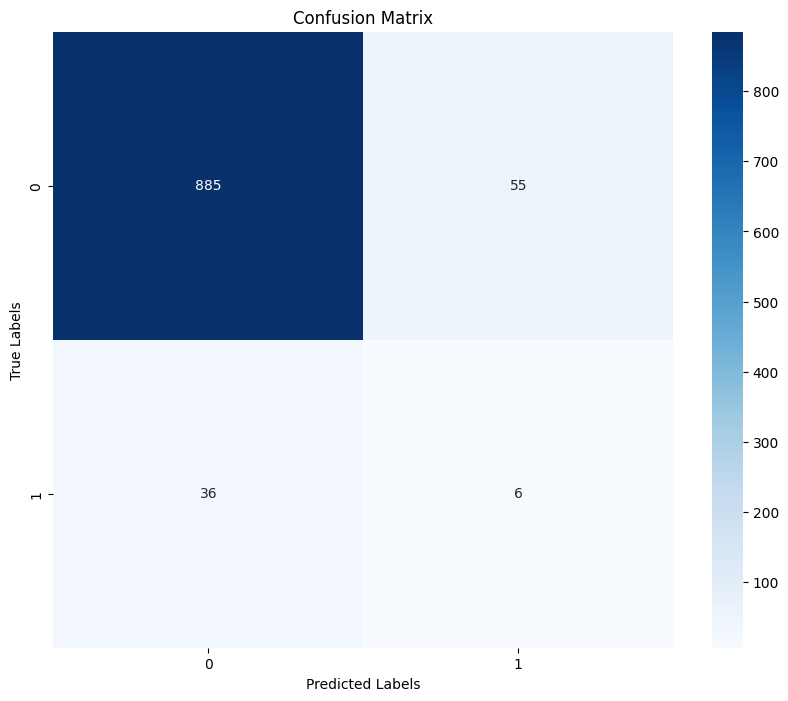

In [94]:
# xgboost is the best model
#fit with test data

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming xgb_grid.best_estimator_ is the best SVM classifier obtained from GridSearchCV
best_xgb = xgb_grid.best_estimator_

# Predict labels on the test set
y_pred = best_xgb.predict(X_test)

# Get unique class labels from the predicted and true labels
classes = sorted(set(y_test) | set(y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##### 7.3.2. Log Reg

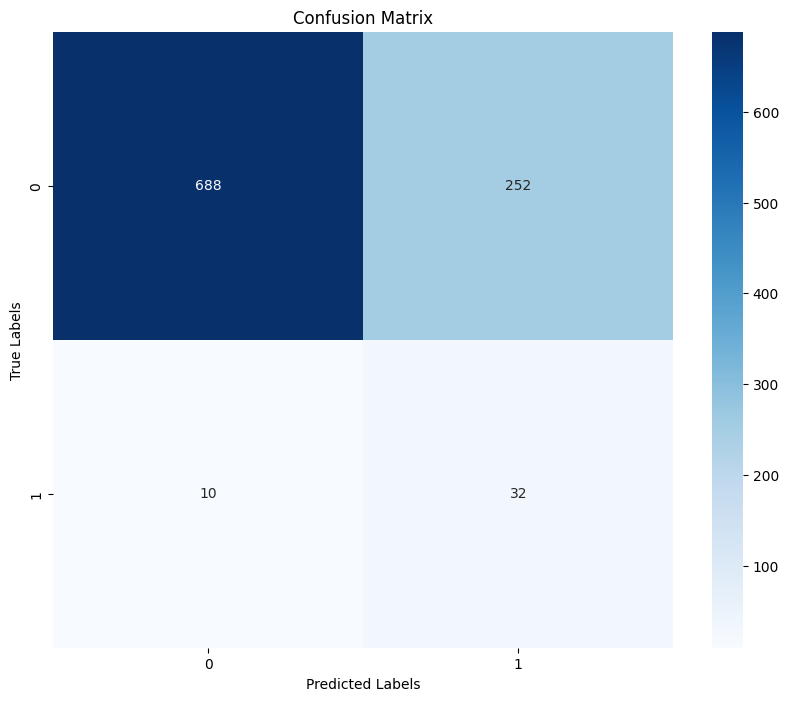

In [96]:
# for log Reg

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming log_reg_grid.best_estimator_ is the best SVM classifier obtained from GridSearchCV
best_log_reg = log_reg_grid.best_estimator_

# Predict labels on the test set
y_pred = best_log_reg.predict(X_test)

# Get unique class labels from the predicted and true labels
classes = sorted(set(y_test) | set(y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##### 7.3.3. Random Forest

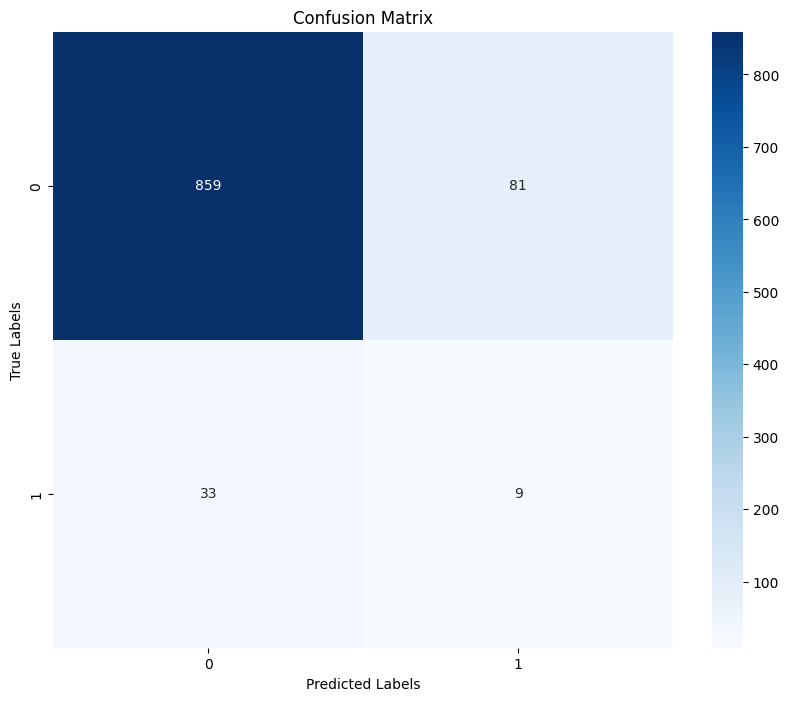

In [98]:
# for Random Forest

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming rf_grid.best_estimator_ is the best SVM classifier obtained from GridSearchCV
best_rf = rf_grid.best_estimator_

# Predict labels on the test set
y_pred = best_rf.predict(X_test)

# Get unique class labels from the predicted and true labels
classes = sorted(set(y_test) | set(y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##### 7.3.4. K Nearest Neighbours

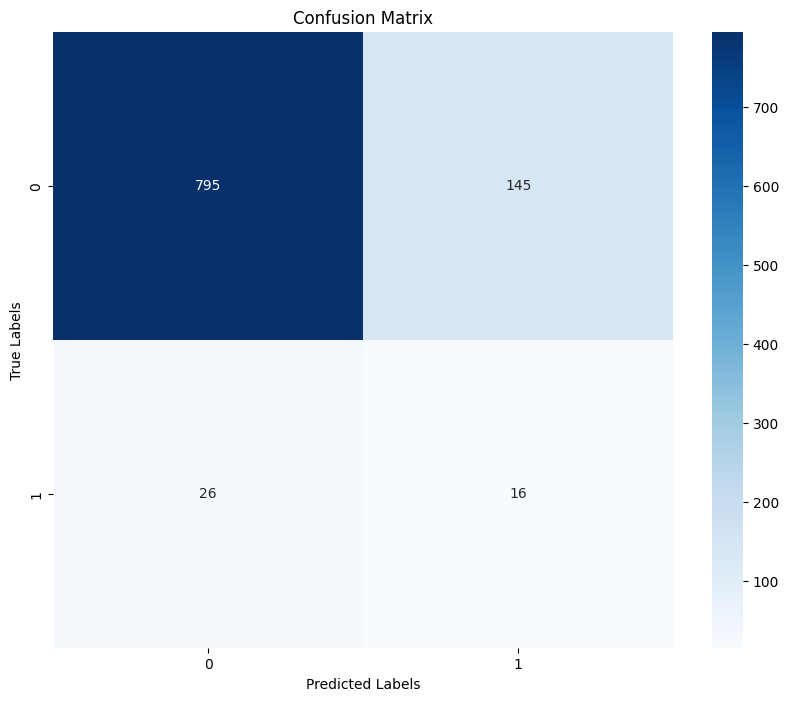

In [100]:
# for k nearest neighbours

# Assuming rf_grid.best_estimator_ is the best SVM classifier obtained from GridSearchCV
best_knn = knn_grid.best_estimator_

# Predict labels on the test set
y_pred = best_knn.predict(X_test)

# Get unique class labels from the predicted and true labels
classes = sorted(set(y_test) | set(y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##### 7.3.5. ANN

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


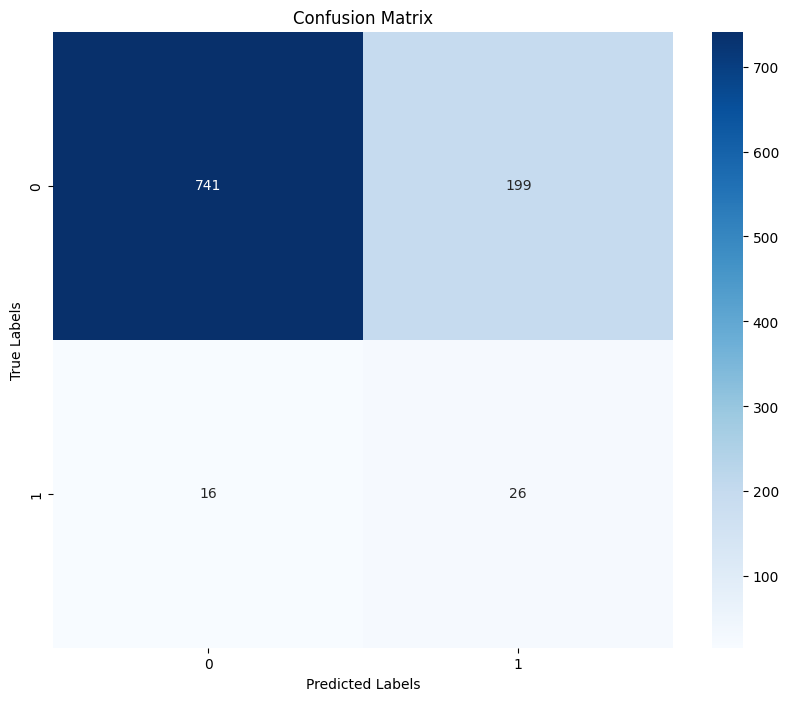

In [164]:

# Predict probabilities using the model
predicted_probabilities = model.predict(X_test)

# Define the threshold for binary classification
threshold_value = 0.5  # Default threshold, can be adjusted if needed

# Convert the predicted probabilities to binary labels (0 or 1)
y_pred = (predicted_probabilities > threshold_value).astype(int).ravel()  # Ensure y_pred is 1D

# Ensure that y_test is also 1D
# y_test = y_test.ravel() - not necessary (already 1D)

# Check for class mismatches and get the union of unique class labels
classes = sorted(set(y_test) | set(y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Best performing model is xgboost. All model predict the possibility of stroke poorly

## 8: Model Deployment 